In [1]:
import numpy as np
from kmcluster.core.kmc import kmc
from kmcluster.core.transition_conditions import rfkmc, rkmc
from kmcluster.core.intialize import random_init, boltz, global_minimum_only, selected
from kmcluster.core.data import pull_json, sparse_to_rate_mat
import networkx as nx
import matplotlib.pyplot as plt
import plotly.graph_objs as go

In [2]:
Pt_H1_links = [
    [0, 1, 0.15],
    [0, 2, 0.61],
    [0, 3, 0.39],
    [2, 4, 0.27],
    [2, 6, 0.50],
    [2, 8, 0.66],
    [3, 8, 0.50],
    [5, 7, 0.52],
    [5, 9, 0.66],
    [5, 6, 0.66],
]
H_H1_links = [
    [0, 6, 0.52],
    [1, 2, 0.28],
    [2, 5, 0.22],
    [3, 5, 0.22],
    [7, 8, 0.15],
    [8, 9, 0.14],
]
Pt4H1_rawE = [
    -17.71720725,
    -17.68531409,
    -17.57336808,
    -17.50640668,
    -17.50097929,
    -17.50887522,
    -17.38155630,
    -17.25580137,
    -17.15164472,
    -17.13649884,
]
H1_E = [Pt4H1_rawE[x] - Pt4H1_rawE[0] for x in range(0, len(Pt4H1_rawE))]
rates_mat = sparse_to_rate_mat(Pt_H1_links, len(Pt4H1_rawE))

In [3]:
time_end = 100  # time stop condition
steps = 100  # number of steps
size = 100  # number of independet trajectories
n_states = 10  # number of states
energies = [0, 1.0, 1.0, -1.0]  # list of energies
init_dict = {
    0: 0.5,
    1: 0.5,
}  # dictionary of custom proportions to start with ({state:proportion,...})
temp_boltz = 1.0  # temperature for boltzmann distribution + kmc
temp_sample = 1.0  # temp for sampling kmc

In [4]:
rfkmc_obj = rfkmc()

init_boltz = boltz(energies=H1_E, T=temp_boltz, size=10000)

# initialize kmc object
kmc_boltz = kmc(
    steps=1000,
    time_stop=1000,
    pop_size=1000,
    rates=rates_mat,
    draw_crit=rfkmc_obj,
    initialization=init_boltz,
)

# run calcs
kmc_boltz.run(n_steps=1000)
trajectories = kmc_boltz.trajectories

100%|██████████| 1000/1000 [00:02<00:00, 339.78it/s]


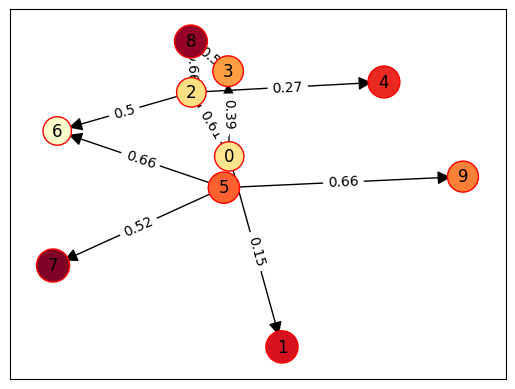

[(0, {}), (1, {}), (2, {}), (3, {}), (4, {}), (6, {}), (8, {}), (5, {}), (7, {}), (9, {})]


In [5]:
def graph_trajectories_static(frame, trajectories, rates, ret_pos=False, pos=None):
    """
    given a list of trajectories, plot the state of at time_to_plot as a graph
    """
    # make matrix whether there is a rate connecting two states
    G = nx.DiGraph()

    rates_binary = np.zeros((len(rates), len(rates)))

    for i in range(len(rates)):
        for j in range(len(rates)):
            if rates[i][j] > 0:
                G.add_weighted_edges_from(
                    [(i, j, rates[i][j])], label=round(rates[i][j], 2)
                )
                rates_binary[i][j] = 1

    counts = {}
    for traj in trajectories:
        state = traj.state_at_time(frame)
        if state in counts:
            counts[state] += 1
        else:
            counts[state] = 1

    # sort counts by key
    counts = dict(sorted(counts.items()))
    counts_list = list(counts.values())
    counts_transformed = [400 + (i / 10) for i in counts_list]

    if pos is None:
        pos = nx.spring_layout(G)

    n = nodes = nx.draw_networkx_nodes(
        G,
        pos,
        node_color=counts_transformed,
        node_size=counts_transformed,
        cmap=plt.cm.YlOrRd,
    )

    # Set edge color to red
    nodes.set_edgecolor("r")
    e = nx.draw_networkx_edges(G, pos, arrowstyle="-|>", arrowsize=20)

    # Uncomment this if you want your labels
    n_labels = nx.draw_networkx_labels(G, pos)

    # edge labels
    e_labels = nx.draw_networkx_edge_labels(
        G,
        pos,
        edge_labels=nx.get_edge_attributes(G, "label"),
    )

    plt.show()
    print(G.nodes(data=True))
    return G, e, n, n_labels, e_labels, pos


G, e, n, n_labels, e_labels, pos = graph_trajectories_static(
    trajectories=trajectories, rates=rates_mat, frame=1, ret_pos=True
)

In [12]:
import numpy as np

# create 2 by 2 matrix of zeros
mat = np.zeros((11, 10))
# set first column to 1
mat[:, 0] = 1
# set second column to 2
mat[:, 1] = 2
# save as npy file called mat.npy
file = "test"
start_time = 0
end_time = 1
step = 0.1
file = "{}_start_{}_end_{}_step_{}.npy".format(file, start_time, end_time, step)
print(file)
np.save(file, mat)

test_start_0_end_1_step_0.1.npy


In [8]:
# load matrix
mat = np.load(file)

In [11]:
mat

array([[1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])